In [101]:
import pandas as pd
import matplotlib.pyplot as plt 


In [28]:
default = pd.read_csv("Results/Logs/default.csv")
bit = pd.read_csv("Results/Logs/bit.csv")
hc = pd.read_csv("Results/Logs//hc.csv")
hc2 = pd.read_csv("Results/Logs/hc2.csv")
soft = pd.read_csv("Results/Logs/soft.csv")
hc_discounted = pd.read_csv("Results/Logs/hc_discounted.csv")

In [102]:
best_values = {}
df_maps = {"Vanilla Genome + Vanilla Reproduction": default, "Bit-Quantized Genome + Vanilla Reproduction": bit, "Bit-Quantized Genome + Softmax Reproduction": soft}

for name, df in df_maps.items():
    best_values[name] = df['Best fitness'].head(100).round(2).tolist()


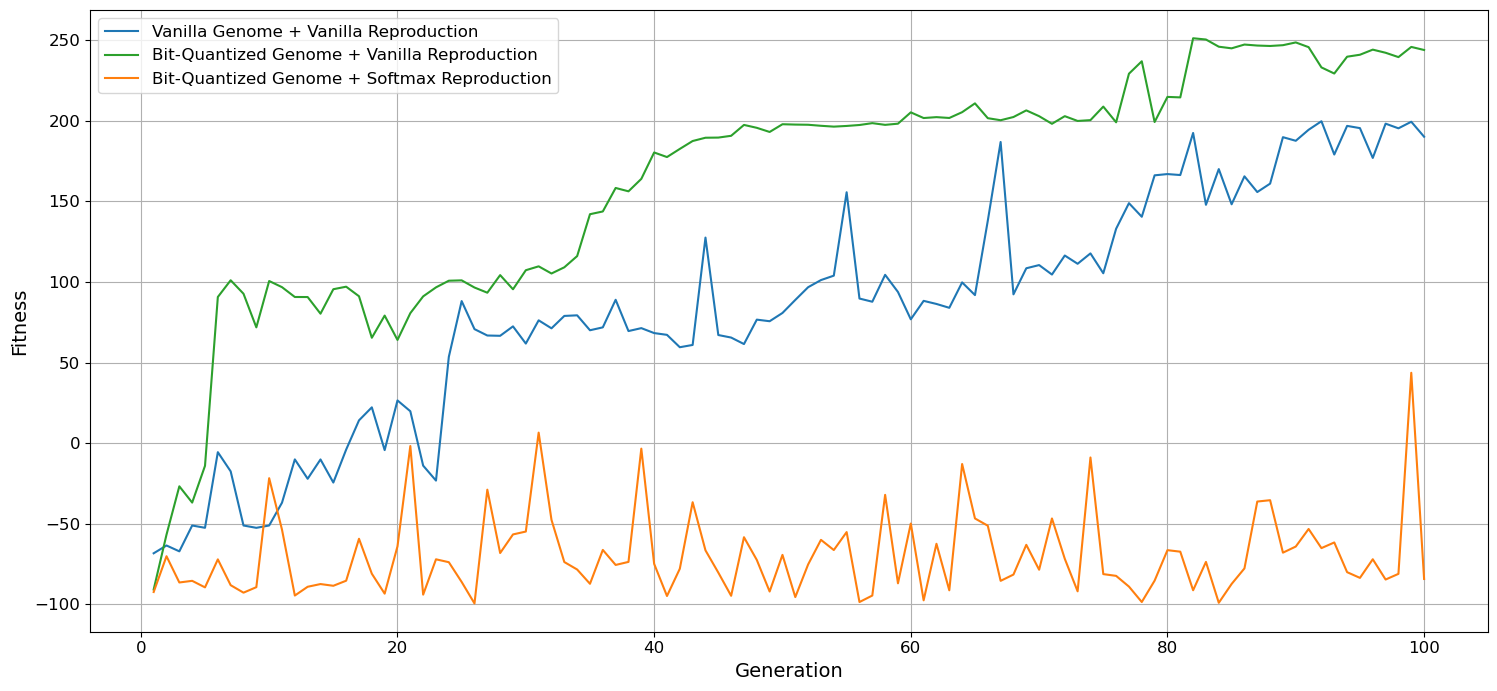

In [103]:
generations = range(1, len(best_values["Vanilla Genome + Vanilla Reproduction"]) + 1)

plt.figure(figsize=(15, 7))  
colors = ['tab:blue', 'tab:green', 'tab:orange']
for i, (method, fitness) in enumerate(best_values.items()):
    plt.plot(generations, fitness, label=method, color=colors[i], linestyle='-')

# plt.title('Fitness of Bipedal Walker in normal mode', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [106]:
best_values = {}
df_maps = {"Hardcore mode": hc, "Normal + Hardcore": hc2, "Hardcore + Normal with discounted reward": hc_discounted}

for name, df in df_maps.items():
    best_values[name] = df['Best fitness'].head(100).round(2).tolist()


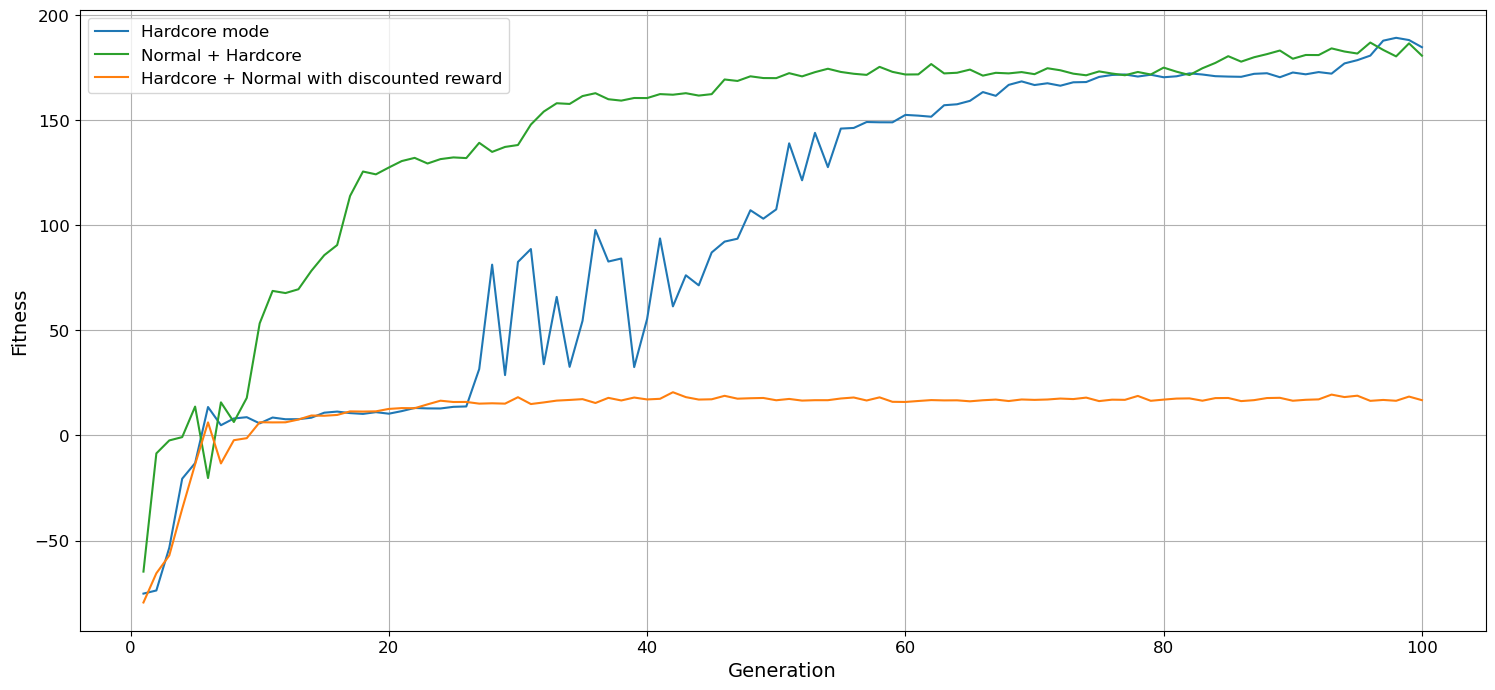

In [107]:
generations = range(1, len(best_values["Hardcore mode"]) + 1)

plt.figure(figsize=(15, 7))  
colors = ['tab:blue', 'tab:green', 'tab:orange']
for i, (method, fitness) in enumerate(best_values.items()):
    plt.plot(generations, fitness, label=method, color=colors[i], linestyle='-')

# plt.title('Fitness of Bipedal Walker in Hardcore mode', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [110]:
import bitneat
import neat
import os
import gymnasium as gym

In [111]:
# Load the NEAT configuration
config = neat.Config(
    bitneat.BitGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "bit-bipedal.txt"
)

In [117]:
base_path = "Results"
gen = 299
genome = bitneat.read_genome(os.path.join(base_path, f'genome_{gen}.pkl'))
env = gym.make("BipedalWalker-v3", hardcore=False, render_mode="rgb_array")
net = neat.nn.FeedForwardNetwork.create(genome, config)

print("Generation:", gen)
print('Fitness:', round(genome.fitness, 2))
print("Nodes, Connections:", genome.size())
print("Sum of Biases:", sum([t.bias for t in genome.nodes.values()]))
print("Weight distribution:", set([t.weight for t in genome.connections.values()]))

Generation: 299
Fitness: 254.29
Nodes, Connections: (27, 101)
Sum of Biases: 0.0
Weight distribution: {0.0, 1.0, -1.0}


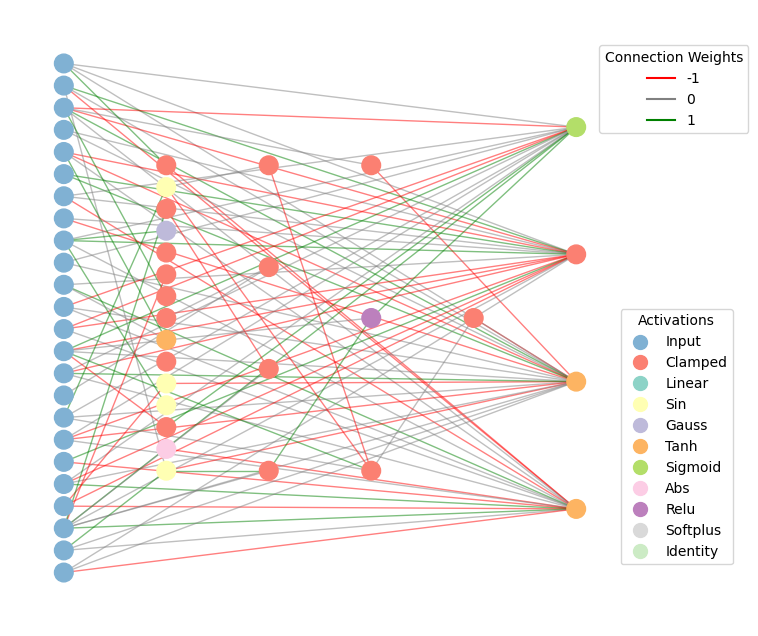

In [118]:
bitneat.show(genome)

100%|█████████▉| 1599/1601 [00:11<00:00, 133.93it/s]


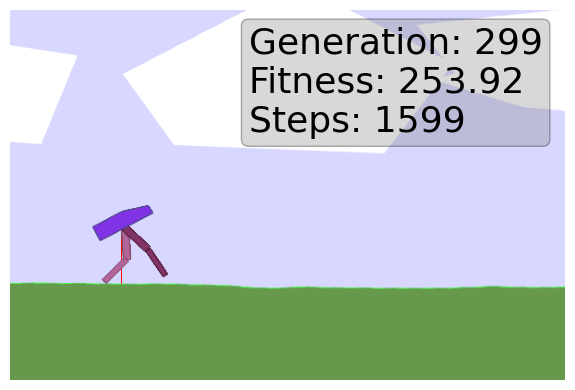

In [119]:
bitneat.laststate(net, env, frame_count=1601, gen=gen)

100%|██████████| 1/1 [00:15<00:00, 15.83s/it]


Animation saved at: gen_299.gif
Number of Frames: 1599
Time taken: 0:03:24.771146


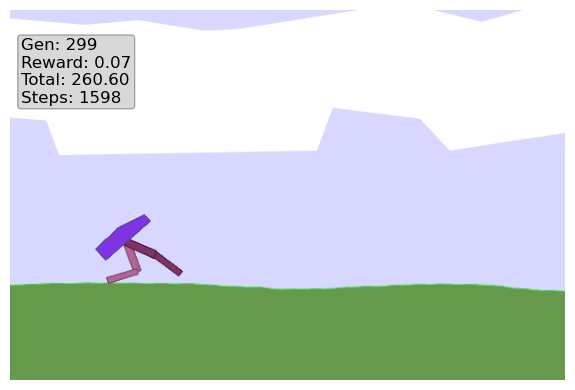

In [120]:
bitneat.animate_generations([[gen, net]], "gen_299.gif", frame_count=1600)